This file compiles all of the different datasets.

TODO:
- [ ] Add pairwise (gravity) file
- [ ] Figure out why there are different numbers of districts for each file

**Important note** PRMN data must be retrieved from Katherine's local desktop as it is not public.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import jetson_configs as cfg

%matplotlib inline

In [2]:
data_dir = 'data/clean'

# Compile admin1

In [3]:
acled = pd.read_csv(f"{data_dir}/acled_admin1.csv", index_col=['region', 'date'])
prmn  = pd.read_csv(f"{data_dir}/prmn_admin1.csv",  index_col=['region', 'date'])
fsnau = pd.read_csv(f"{data_dir}/fsnau_admin1.csv", index_col=['region', 'date'])
ew_ea = pd.read_csv(f"{data_dir}/ew_ea_admin1.csv", index_col=['region', 'date'],
                   usecols=['awd_cholera_deaths', 
                            'awd_cholera_cases',
                            'malaria_cases', 
                            'measles_cases', 
                            'new_admissions_gam',
                            'rainfall', 
                            'vegetation_cover_ndvi',
                            'region',
                            'date'])

ew_ea_rivers = pd.read_csv(f"{data_dir}/ew_ea_rivers.csv",     index_col=['date'])
distances    = pd.read_csv(f"{data_dir}/distances_admin1.csv", index_col=['region'])

In [4]:
# Merge
master = pd.merge(prmn,   acled,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, fsnau,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, ew_ea,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, distances,    left_index=True, right_index=True, how='outer')
master = pd.merge(master, ew_ea_rivers, left_index=True, right_index=True, how='outer')

# Restrict dates
master = master[pd.to_datetime(master.index.get_level_values('date')) >= pd.to_datetime('2010-01-01')]

# Save
master.to_csv("data/compiled/master_admin1.csv")

In [5]:
# Check that there are only 18 regions
assert(len(master.index.get_level_values('region').unique())==18)

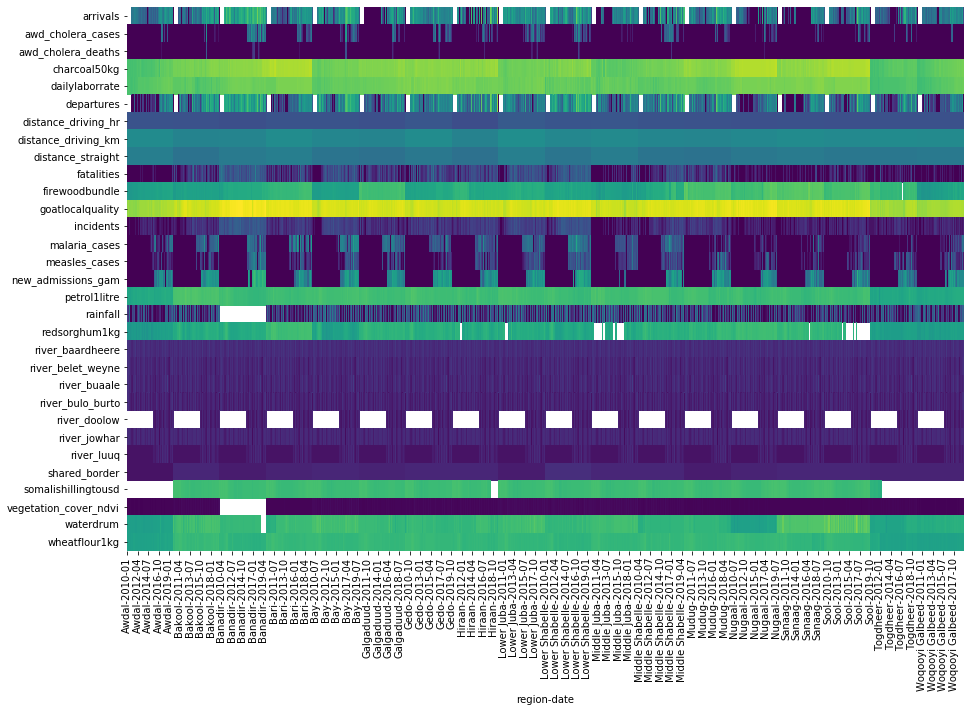

In [6]:
# Plot
fig, ax = plt.subplots(1,1, figsize=[15,10])
sns.heatmap(np.log(1+master.T).sort_index(level='date'), cbar=None, cmap='viridis', ax=ax)

# Compile Admin2

In [7]:
acled = pd.read_csv(f"{data_dir}/acled_admin2.csv", index_col=['region', 'district', 'date'])
prmn  = pd.read_csv(f"{data_dir}/prmn_admin2.csv", index_col=['region', 'district', 'date'])
fsnau = pd.read_csv(f"{data_dir}/fsnau_admin2.csv", index_col=['region','district',  'date'])
ew_ea = pd.read_csv(f"{data_dir}/ew_ea_admin2.csv", index_col=['region', 'district', 'date'],
                   usecols=['awd_cholera_deaths', 
                            'awd_cholera_cases',
                            'malaria_cases', 
                            'measles_cases', 
                            'new_admissions_gam',
                            'rainfall', 
                            'vegetation_cover_ndvi',
                            'region',
                            'district',
                            'date'])

ew_ea_rivers = pd.read_csv(f"{data_dir}/ew_ea_rivers.csv", index_col=['date'])
distances    = pd.read_csv(f"{data_dir}/distances_admin2.csv", index_col=['district'])

In [8]:
len(distances.index)

74

In [9]:
len(prmn.index.get_level_values('district').unique())

95

In [10]:
len(acled.index.get_level_values('district').unique())

92

In [11]:
len(ew_ea.index.get_level_values('district').unique())

74

In [12]:
len(fsnau.index.get_level_values('district').unique())

61

In [13]:
names_map = {
    'Adan Yabal'     : 'Adan Yabaal', 
    'Bandar Beyla'   : 'Bandarbeyla', 
    'Belet Xaawa'    : 'Belet Xaawo' , 
    'Bossaasso'      : 'Bossaso', 
    "Bu'Aale"        : "Bu'aale", 
    'Bulo Burti'     : 'Bulo Burto', 
    'Ceel Afweyne'   : 'Ceel Afweyn', 
    'Ceel Bur'       : 'Ceel Buur', 
    'Ceel Dheere'    : 'Ceel Dheer', 
    'Dhuusa Marreeb' : 'Dhusamarreeb', 
    'Diinsor'        : 'Diinsoor', 
    'Goldogob'       : 'Galdogob', 
    'Garbaharey'     : 'Garbahaarey', 
    'Lasqoray'       : 'Laasqoray', 
    'Mogadisho'      : 'Mogadishu', 
    'Qoryoley'       : 'Qoryooley', 
    'Tayeglow'       : 'Tayeeglow', 
    'Wajid'          : 'Waajid', 
    'Wanla Weyne'    : 'Wanla Weyn'
}

for df in [fsnau, prmn, ew_ea,  acled]:
    df.reset_index(inplace=True)
    df['district'] = df.district.replace(names_map)
    df.set_index(['date', 'region', 'district'], inplace=True)

In [14]:
master = pd.merge(prmn,   acled,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, fsnau,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, ew_ea,        left_index=True, right_index=True, how='outer')
master = pd.merge(master, distances,    left_index=True, right_index=True, how='outer')
master = pd.merge(master, ew_ea_rivers, left_index=True, right_index=True, how='outer')

# Restrict dates
master = master[pd.to_datetime(master.index.get_level_values('date')) >= pd.to_datetime('2010-01-01')]

# Save
master.to_csv("data/compiled/master_admin2.csv")

In [15]:
# Confirm the right number of regions
assert(len(master.index.get_level_values("region").unique())==18)

# Check the number of districts
len(master.index.get_level_values("district").unique())

107

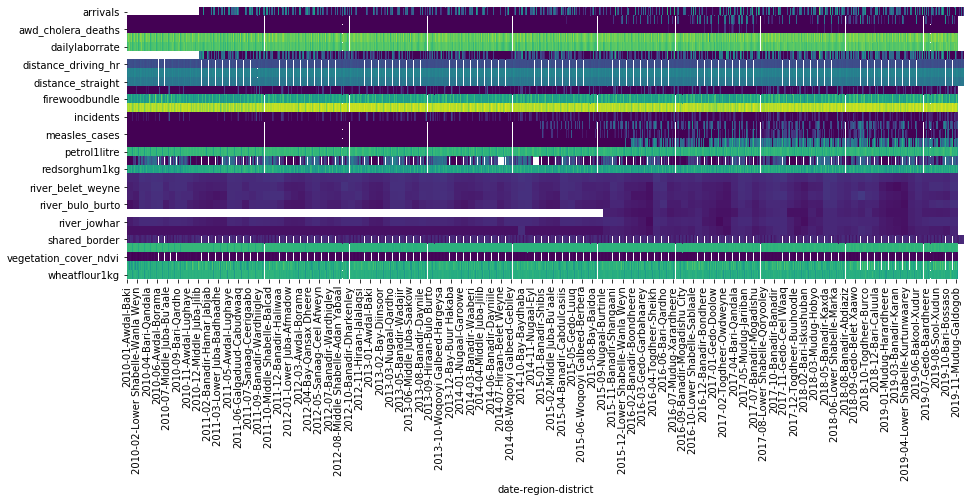

In [16]:
# Plot
fig, ax = plt.subplots(1,1, figsize=[15,5])
sns.heatmap(np.log(1+master.T).sort_index(level='district'), cbar=None, cmap='viridis', ax=ax)